<a href="https://colab.research.google.com/github/Loomer/2022-itc303-team08/blob/ml-manu/ml_manu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b ml-manu https://github.com/Loomer/2022-itc303-team08.git

fatal: destination path '2022-itc303-team08' already exists and is not an empty directory.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
import numpy as np 
import matplotlib.pyplot as pypt 
import cv2
import os 

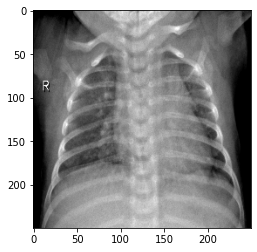

In [17]:
image_set = "/content/2022-itc303-team08/images/train"
imageType = ["COVID", "NORMAL"]
train_set = []
train_labels = []

def create_train_data():
  for imgType in imageType: 

    link = os.path.join(image_set, imgType)  
    
        
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      img_array = cv2.imread(os.path.join(link, img))  
      new_img_array = cv2.resize(img_array, (250, 250))  
      train_set.append(new_img_array)
      train_labels.append(imageType.index(imgType)) 

create_train_data()
pypt.imshow(train_set[0])

In [5]:
train_set = np.array(train_set)
train_labels = np.array(train_labels)
train_set = train_set/255.0

In [6]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)])
  
  
  model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [7]:
model = create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 476288)            0         
                                                                 
 dropout (Dropout)           (None, 476288)            0

In [8]:
test_set = []
test_labels = []

test_image_set = "/content/2022-itc303-team08/images/test"

def create_test_data():
  for imgType in imageType: 

    link = os.path.join(test_image_set, imgType)  
        
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      test_img_array = cv2.imread(os.path.join(link, img))  
      new_test_array = cv2.resize(test_img_array, (250, 250)) 
      test_set.append(new_test_array)
      test_labels.append(imageType.index(imgType)) 

create_test_data()
print(len(test_set))
print(test_labels)

10
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


In [9]:
test_set = np.array(test_set)
test_labels = np.array(test_labels)
test_set = test_set/255.0

model.evaluate(test_set, test_labels)

1/1 [==============================] - 1s 1s/step - loss: 0.7003 - accuracy: 0.5000


[0.7002816796302795, 0.5]

In [10]:
checkpoint_path = "2022-itc303-team08/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose =1, period = 10)

new_model = create_model()

new_model.fit(train_set, train_labels, epochs=30, validation_data = (test_set, test_labels), callbacks = [cp_callback])

!ls {checkpoint_dir}

Epoch 1/30
7/7 [==============================] - 64s 9s/step - loss: 9.7203 - accuracy: 0.5200 - val_loss: 0.6460 - val_accuracy: 0.6000
Epoch 2/30
7/7 [==============================] - 59s 8s/step - loss: 0.4309 - accuracy: 0.7800 - val_loss: 0.0839 - val_accuracy: 1.0000
Epoch 3/30
7/7 [==============================] - 59s 8s/step - loss: 0.1357 - accuracy: 0.9450 - val_loss: 0.1803 - val_accuracy: 0.9000
Epoch 4/30
7/7 [==============================] - 59s 8s/step - loss: 0.0473 - accuracy: 0.9800 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 5/30
7/7 [==============================] - 59s 8s/step - loss: 0.0433 - accuracy: 0.9800 - val_loss: 0.4836 - val_accuracy: 0.9000
Epoch 6/30
7/7 [==============================] - 59s 8s/step - loss: 0.0753 - accuracy: 0.9700 - val_loss: 0.0902 - val_accuracy: 0.9000
Epoch 7/30
7/7 [==============================] - 59s 8s/step - loss: 0.0777 - accuracy: 0.9750 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 8/30
7/7 [==================

In [11]:
model = create_model()
loss, acc = model.evaluate(test_set, test_labels)
print(loss, acc)

1/1 [==============================] - 1s 1s/step - loss: 0.7128 - accuracy: 0.5000
0.7128449082374573 0.5


In [12]:
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(test_set, test_labels)
print(loss, acc)

1/1 [==============================] - 1s 1s/step - loss: 0.0408 - accuracy: 1.0000
0.040812842547893524 1.0


In [15]:
prediction = model.predict(test_set)
print(prediction)

[[1.0000000e+00 6.2067964e-16]
 [1.0000000e+00 7.4970991e-20]
 [1.0000000e+00 2.0620171e-18]
 [1.0000000e+00 2.9529408e-23]
 [1.0000000e+00 1.4505990e-08]
 [5.6789567e-10 1.0000000e+00]
 [3.3510652e-01 6.6489351e-01]
 [4.6934429e-13 1.0000000e+00]
 [3.7588926e-13 1.0000000e+00]
 [6.2245840e-11 1.0000000e+00]]


In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250, 250))
  test_image = image.img_to_array(img)
  test_image = np.expand_dims(test_image, axis=0)

  images = np.vstack([test_image])
  prediction = model.predict(images)
  print(fn)
  print(prediction)

  print(imageType[np.argmax(prediction[0])])

Saving normal_image_github.png to normal_image_github.png
normal_image_github.png
[[0. 1.]]
NORMAL
